#Fish Data

In [2]:
import pandas as pd

fish = pd.read_csv('Fish.csv', error_bad_lines=False) #오류 발생하는 데이터 빼고 보여달라
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
fish.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [3]:
len(fish)

159

In [5]:
#해당 feature에 어떤 값들이 있는지 알고 싶을 때
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [7]:
x = fish.iloc[:, 1:] #모든 행, 2번째~끝 열
y = fish.loc[:,'Species']

#iloc은 숫자로 위치 표현
#loc은 문자 등 사람이 보기 편한 방식으로 위치 표현

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x) #범위를 동일하게 하는 식을 찾아주기(큰 범위는 나누기로 줄이거나, 위치가 높이있는 범위는 빼기로 아래로 일괄적으로 내려주거나 등)
x_scaled = scaler.transform(x) #그 식을 이용하여 x를 변환 해주기

In [9]:
from sklearn.preprocessing import LabelEncoder #라벨이 숫자로 출력되게끔 하는 것(정확히는 2진법으로 표현해주는 것 ex)[1000],[0100]...)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
#위의 셀과 지금 셀에서 쓰이는 fit은 전처리 시 사용되는 fit >>전체 데이터에 대해서 적용(train data한정 아님)

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
y_pred = clf.predict(x_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 81.25%


Text(0.5, 1.0, 'Confusion_Matrix')

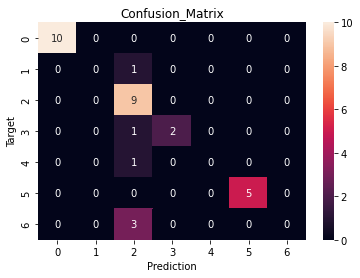

In [19]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True) #annotation 주석달다
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion_Matrix')

#BDIAG Data

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dt = pd.read_csv('bdiag.csv', error_bad_lines=False)
dt.sample(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
140,868999,B,9.738,11.97,61.24,288.5,0.09250,0.04102,0.000000,0.00000,0.1903,0.06422,0.1988,0.4960,1.218,12.26,0.006040,0.005656,0.000000,0.000000,0.02277,0.003220,10.620,14.10,66.53,342.9,0.12340,0.07204,0.00000,0.00000,0.3105,0.08151
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.026380,0.02069,0.1834,0.05934,0.3927,0.8429,2.684,26.99,0.006380,0.010650,0.012450,0.009175,0.02292,0.001461,12.970,22.46,83.12,508.9,0.11830,0.10490,0.08105,0.06544,0.2740,0.06487
372,9012795,M,21.370,15.10,141.30,1386.0,0.10010,0.15150,0.193200,0.12550,0.1973,0.06183,0.3414,1.3090,2.407,39.06,0.004426,0.026750,0.034370,0.013430,0.01675,0.004367,22.690,21.84,152.10,1535.0,0.11920,0.28400,0.40240,0.19660,0.2730,0.08666
271,8910748,B,11.290,13.04,72.23,388.0,0.09834,0.07608,0.032650,0.02755,0.1769,0.06270,0.1904,0.5293,1.164,13.17,0.006472,0.011220,0.012820,0.008849,0.01692,0.002817,12.320,16.18,78.27,457.5,0.13580,0.15070,0.12750,0.08750,0.2733,0.08022
406,905189,B,16.140,14.86,104.30,800.0,0.09495,0.08501,0.055000,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.012460,0.018310,0.008747,0.01500,0.001621,17.710,19.58,115.90,947.9,0.12060,0.17220,0.23100,0.11290,0.2778,0.07012
493,914101,B,12.460,12.83,78.83,477.3,0.07372,0.04043,0.007173,0.01149,0.1613,0.06013,0.3276,1.4860,2.108,24.60,0.010390,0.010030,0.006416,0.007895,0.02869,0.004821,13.190,16.36,83.24,534.0,0.09439,0.06477,0.01674,0.02680,0.2280,0.07028
151,871001502,B,8.219,20.70,53.27,203.9,0.09405,0.13050,0.132100,0.02168,0.2222,0.08261,0.1935,1.9620,1.243,10.21,0.012430,0.054160,0.077530,0.010220,0.02309,0.011780,9.092,29.72,58.08,249.8,0.16300,0.43100,0.53810,0.07879,0.3322,0.14860
437,909220,B,14.040,15.98,89.78,611.2,0.08458,0.05895,0.035340,0.02944,0.1714,0.05898,0.3892,1.0460,2.644,32.74,0.007976,0.012950,0.016080,0.009046,0.02005,0.002830,15.660,21.58,101.20,750.0,0.11950,0.12520,0.11170,0.07453,0.2725,0.07234
166,87127,B,10.800,9.71,68.77,357.6,0.09594,0.05736,0.025310,0.01698,0.1381,0.06400,0.1728,0.4064,1.126,11.48,0.007809,0.009816,0.010990,0.005344,0.01254,0.002120,11.600,12.02,73.66,414.0,0.14360,0.12570,0.10470,0.04603,0.2090,0.07699
501,91504,M,13.820,24.49,92.33,595.9,0.11620,0.16810,0.135700,0.06759,0.2275,0.07237,0.4751,1.5280,2.974,39.05,0.009680,0.038560,0.034760,0.016160,0.02434,0.006995,16.010,32.94,106.00,788.0,0.17940,0.39660,0.33810,0.15210,0.3651,0.11830


In [25]:
x = dt.iloc[:,2:]
y = dt.iloc[:,1]

In [26]:
dt['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [27]:
dt.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [28]:
#만약 null값이 있다면
dt.dropna(inplace=True)

In [37]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [36]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=81)

In [39]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
y_pred = clf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 90.35%


Text(0.5, 1.0, 'Confusion_Matrix')

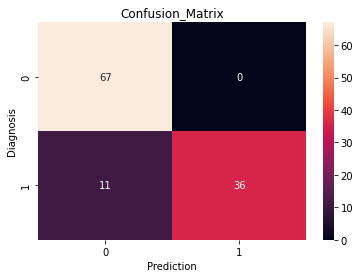

In [43]:
from sklearn.metrics import confusion_matrix

cf = confusion_matrix(y_test,y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Diagnosis')
plt.title('Confusion_Matrix')